In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import animation as am
from matplotlib import cm
from kuramoto import * # import the kuramoto classes from file 
from utils import *

## First, we do some 1D simulations.  

In [2]:
# Set up model parameters 
epsilon = 1
etas = [-1, -0.9, -0.8, -0.7, -0.6, -0.55, -0.5, -0.45, -0.4, -0.3, 0]
sigma = 0.45
mean_omega = 0


# Set up simulation parameters 
L = 160
T = 5e5 # total time of the simulation 
n_frames = 1e5 # number of time points recorded in the end 
grad = 1
grads = [-grad, grad]

In [106]:
data = [] 
omegas = [] 
rhs = [] 
seed = 30


for (i, eta) in enumerate(etas): 
    # Initialise the model and run the simulation 
    init = np.zeros(L)
    model = Kuramoto(epsilon, eta, sigma, mean_omega, BC='grad', grad=grads)
    model.initialise(L, T, n_frames, init=init, seed=seed) 
    model.evolve() # this runs the simulation, set verbose to True to see output at every time step 
    
    phases = np.copy(model.res[-1]) % (2*np.pi)
    shift(phases)
    data.append(phases)
    omegas.append(model.omegas)
    rhs.append(model._det_rhs(phases))

100%|██████████| 100000/100000 [1:33:03<00:00, 17.91it/s] 


In [115]:
np.save('Sims/data_inf_eta_sigma={}.npy'.format(sigma), data)

In [3]:
data = np.load('Sims/data_inf_eta_sigma={}.npy'.format(sigma))

slope:  0.7319385702302852
slope:  0.7557422681622775
slope:  0.7825155785847874
slope:  0.7688921096804175
slope:  0.7388748394090386
slope:  0.7335810004329826
slope:  0.7418042827802596
slope:  0.6685133975826731
slope:  0.6764639759795145
slope:  0.7114737991893083


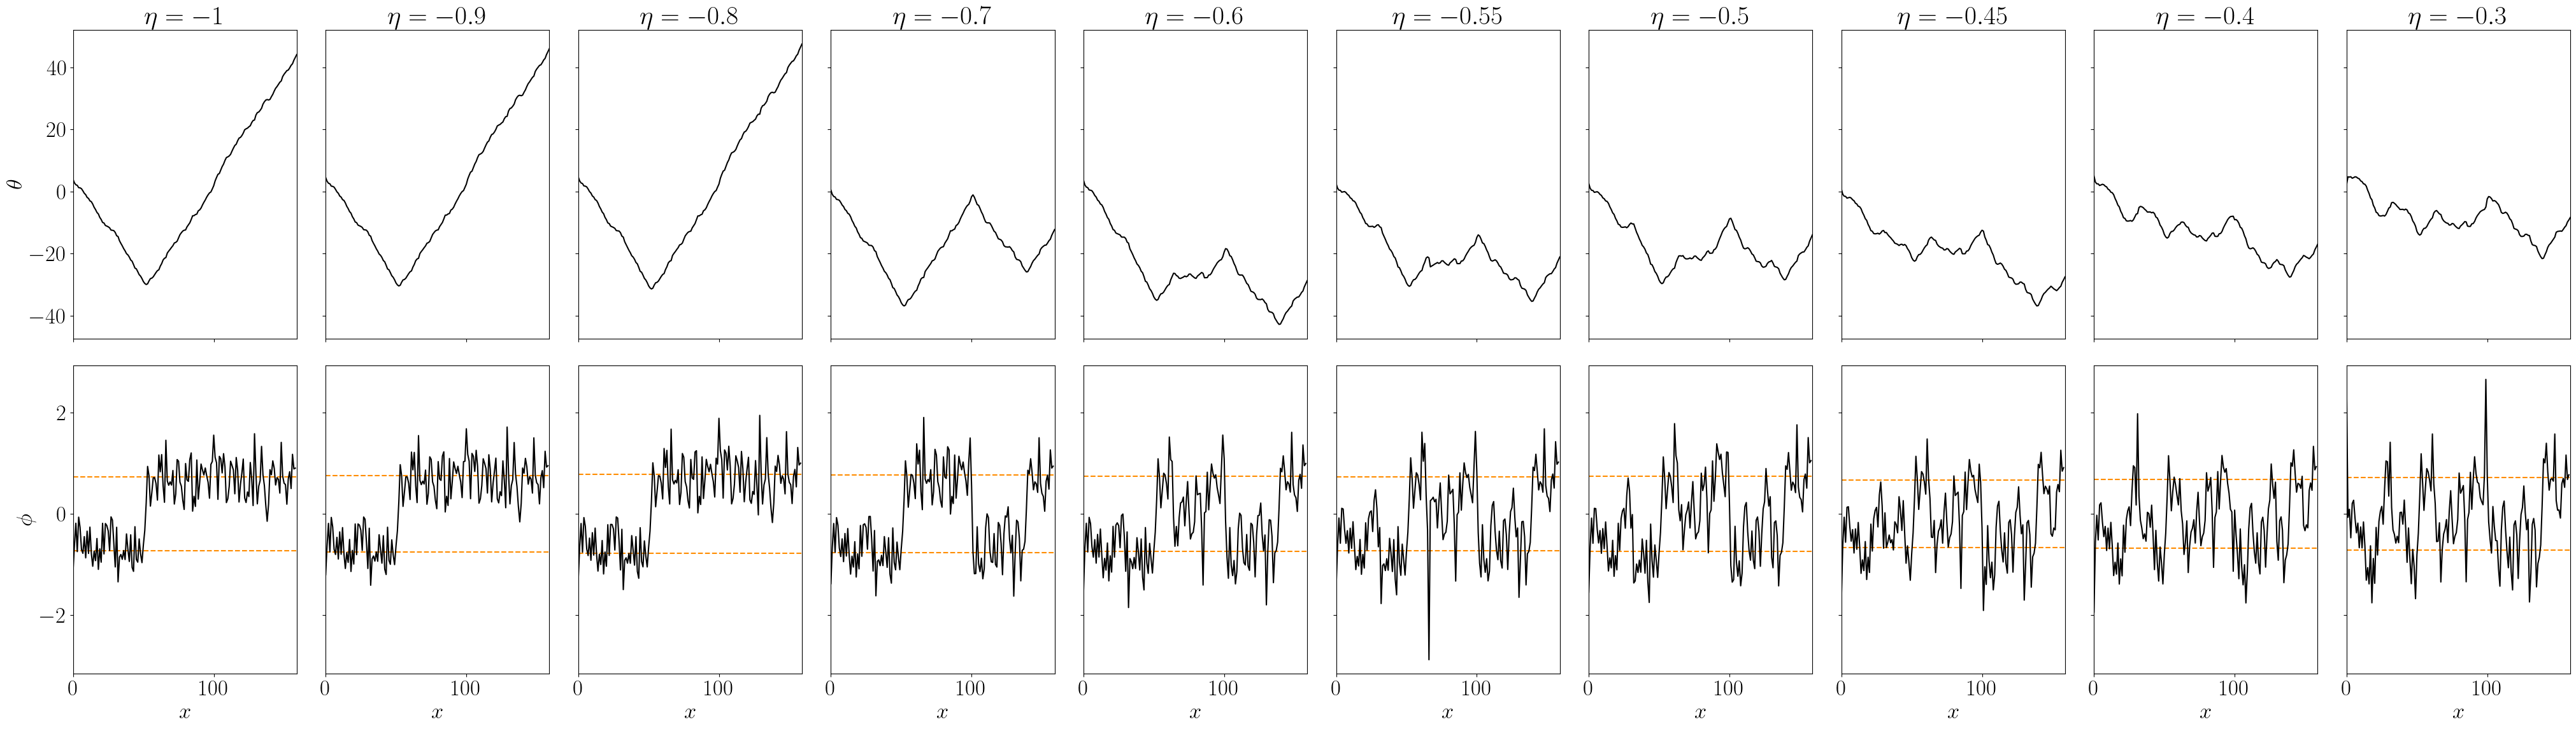

In [4]:
f = 10

plt.rc('text', usetex=True)
plt.rc('font', size=25, family='serif')
fig, axes = plt.subplots(2, len(etas[:f]), sharey='row', sharex=True, figsize=(4*len(etas[:f])+1, 12))

for (i, eta) in enumerate(etas[:f]):
    axes[0, i].plot(data[i], 'k-')    
    
    v = data[i][1:]-data[i][:-1]
    s = np.sqrt(2*np.mean(1-np.cos(v)))
    axes[1, i].axhline(y=s, color='darkorange', linestyle='--')
    axes[1, i].axhline(y=-s, color='darkorange', linestyle='--')
    axes[1, i].plot(v, 'k-')
    axes[1, i].set_xlabel(r'$x$')
    print('slope: ', s)
    axes[0, i].set_title(r'$\eta={}$'.format(etas[i]))
    

axes[0, 0].set_ylabel(r'$\theta$')
axes[1, 0].set_ylabel(r'$\phi$')
plt.xlim([0, L-1])
plt.tight_layout()
plt.show() 

eta:  -1.0019751460447877 , error:  0.13662148739340307 0.19
sigma:  0.46361720061148654 , error:  0.03676723255848017 0.051474125581872233
grad:  0.7843929590546223 , error:  0.6309341320864089 0.7288494956328321


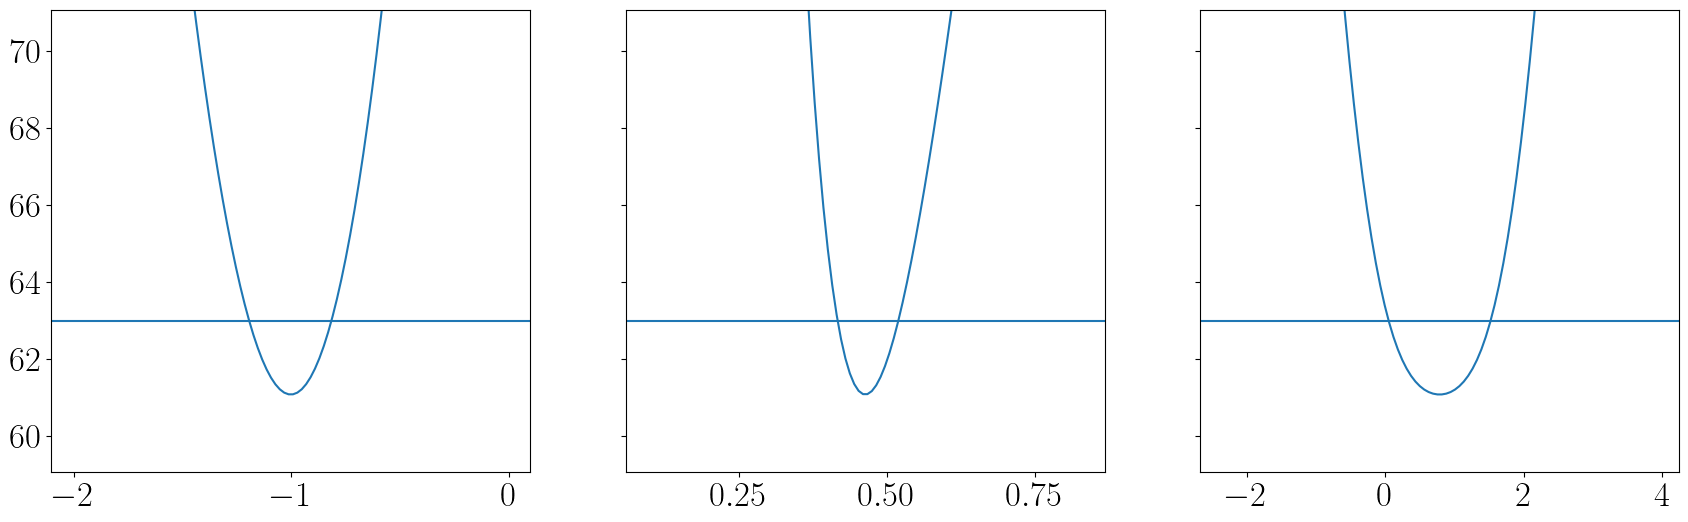

eta:  -0.9140904507049862 , error:  0.12470129071956887 0.17400000000000002
sigma:  0.46645857790905626 , error:  0.03699257098440329 0.0517895993781646
grad:  0.8302773874643391 , error:  0.6339608710751921 0.7414158662471912


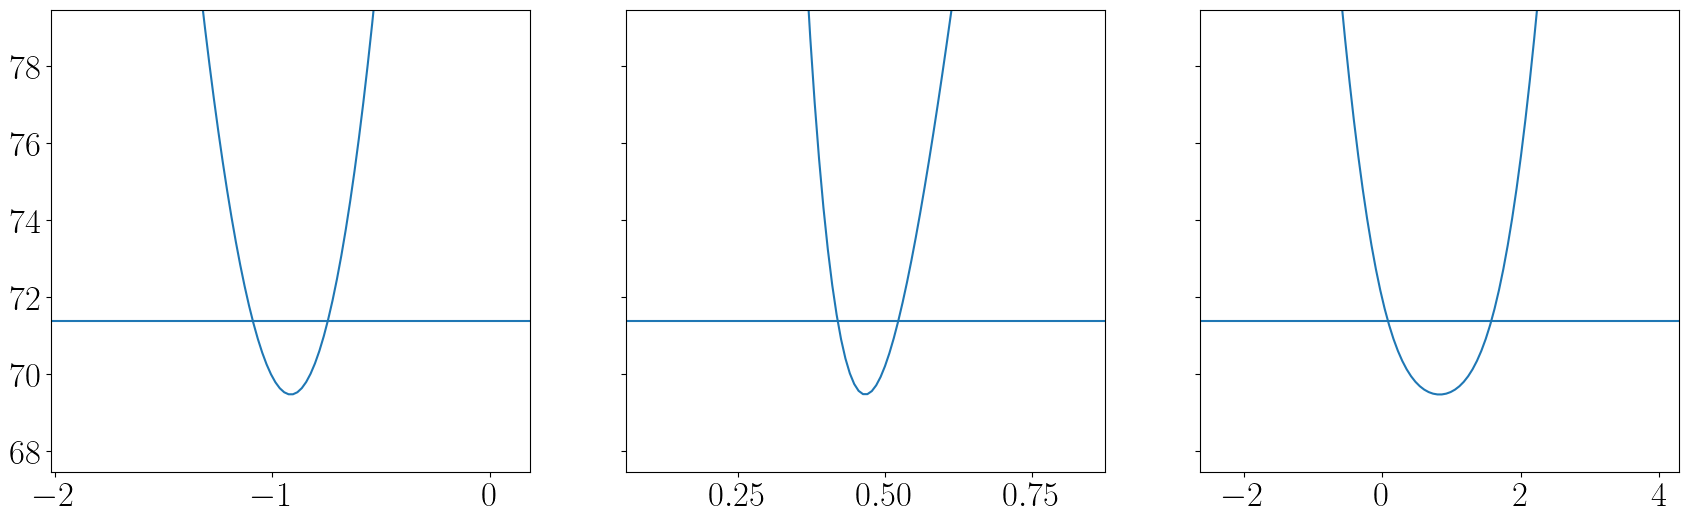

eta:  -0.8347323203925046 , error:  0.11097999625621092 0.154
sigma:  0.4718734706514502 , error:  0.037421995951432856 0.052390794332006003
grad:  0.875209422905171 , error:  0.6395147593601156 0.7539822368615504


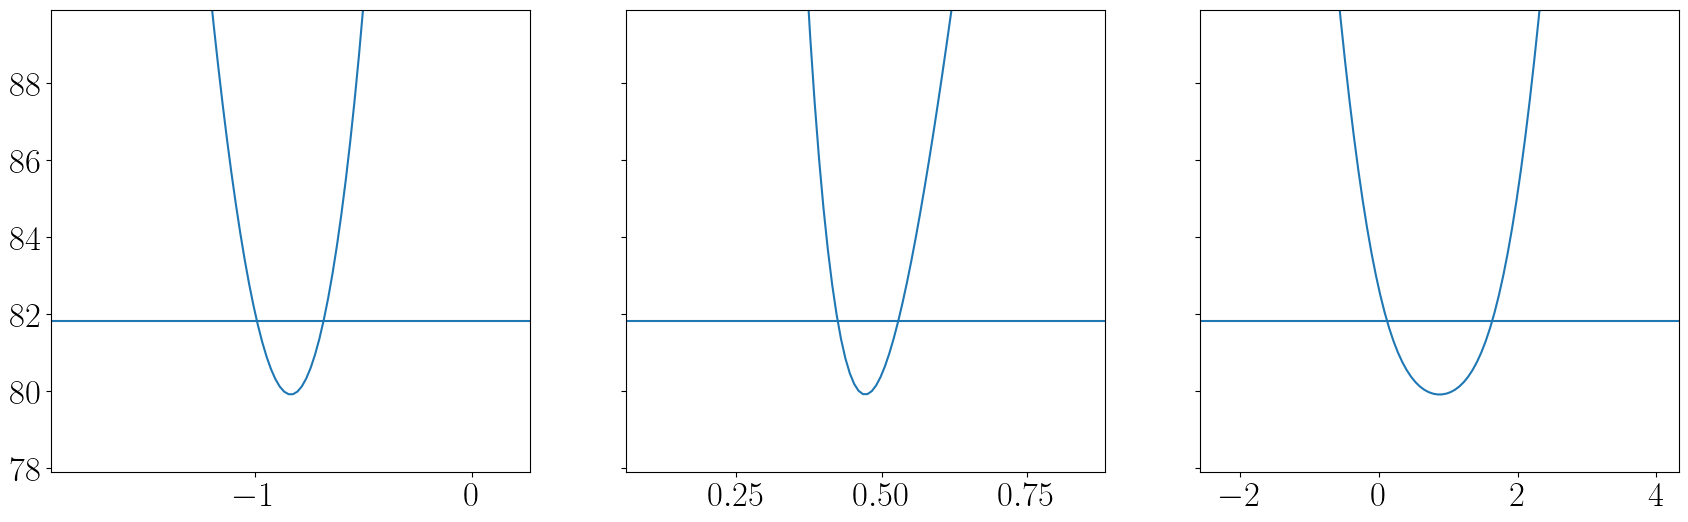

eta:  -0.8091912521349753 , error:  0.0001245459610908714 0.136
sigma:  0.4864308448874685 , error:  0.038576472086417145 0.054007060920984
grad:  0.8368571641327709 , error:  0.6433308865225706 0.7728317927830891


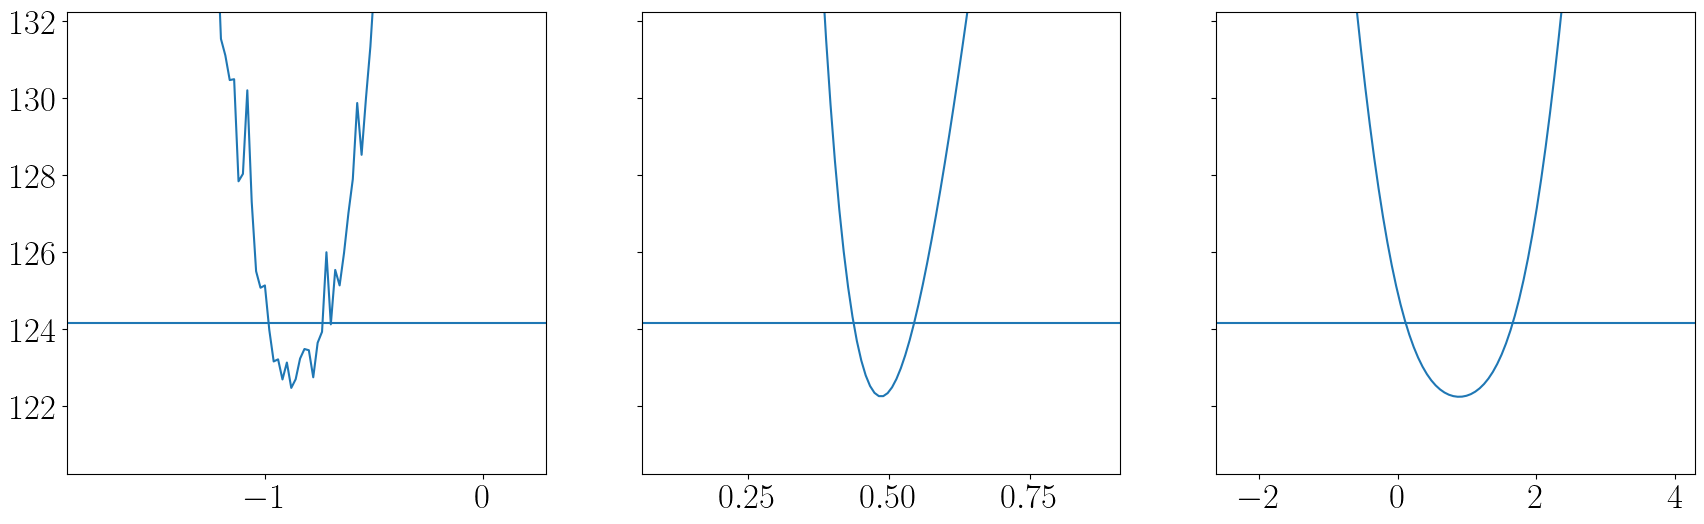

eta:  -0.374888675264102 , error:  0.05807617167795323 0.076
sigma:  0.42760205271760965 , error:  0.03391104544539882 0.04747546362355835
grad:  1.2121670600692602 , error:  0.768190122608015 0.8545132017764238


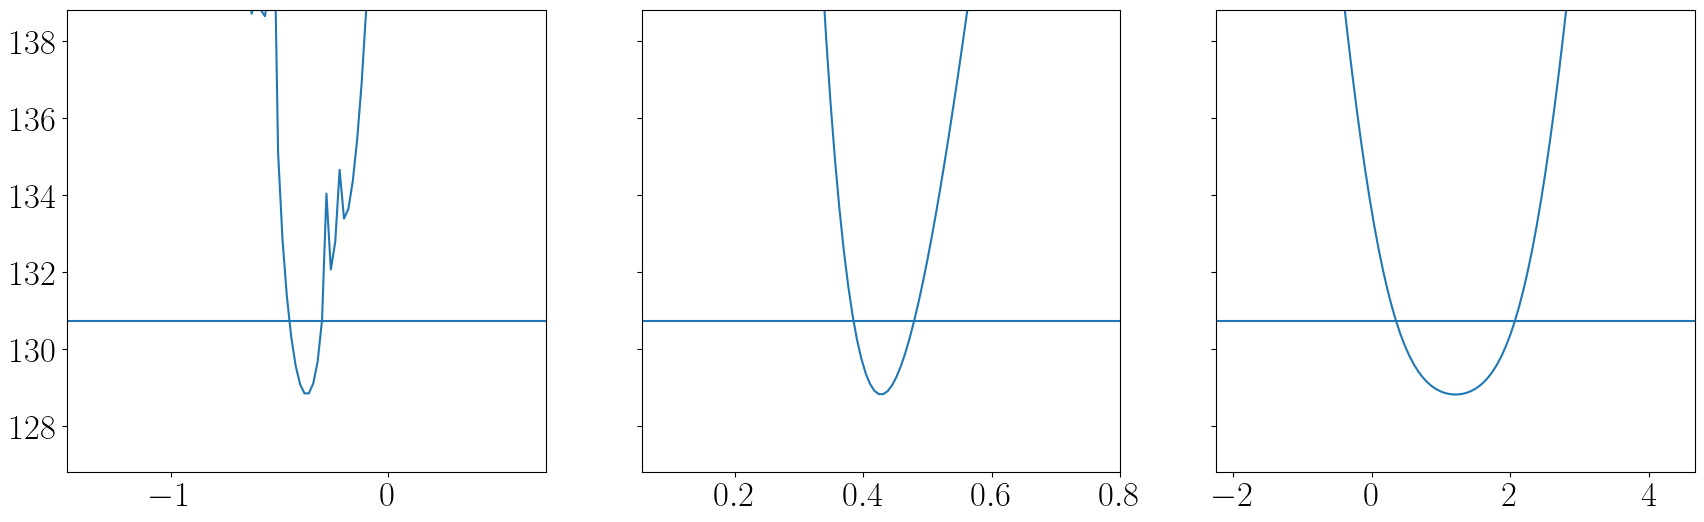

eta:  -0.34815245811489726 , error:  0.06434097318390056 0.08600000000000001
sigma:  0.4285101211297416 , error:  0.03398306083798145 0.04757628517317403
grad:  1.2357268376780375 , error:  0.8031506797981189 0.8796459430051421


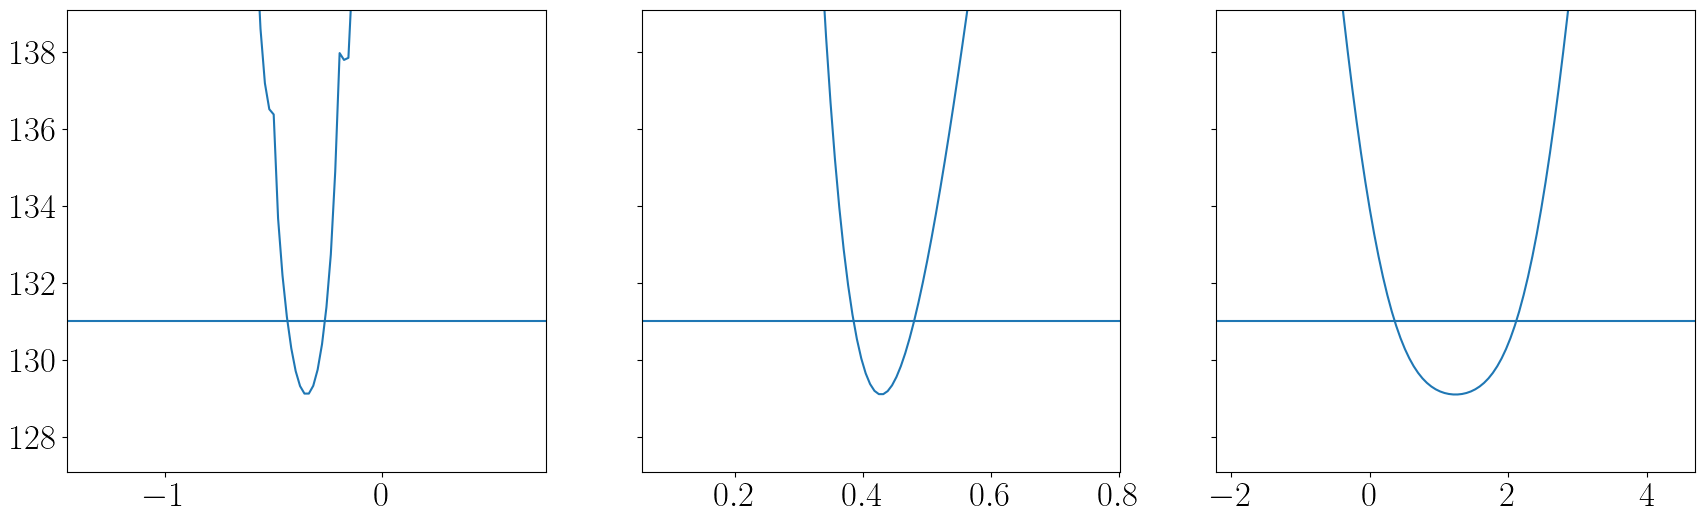

eta:  -0.2698031721836588 , error:  0.042716948407426576 0.17
sigma:  0.4348687415634385 , error:  0.03448733686597459 0.04828227161236443
grad:  1.3072395429092682 , error:  0.8945560034949425 0.9299114254625788


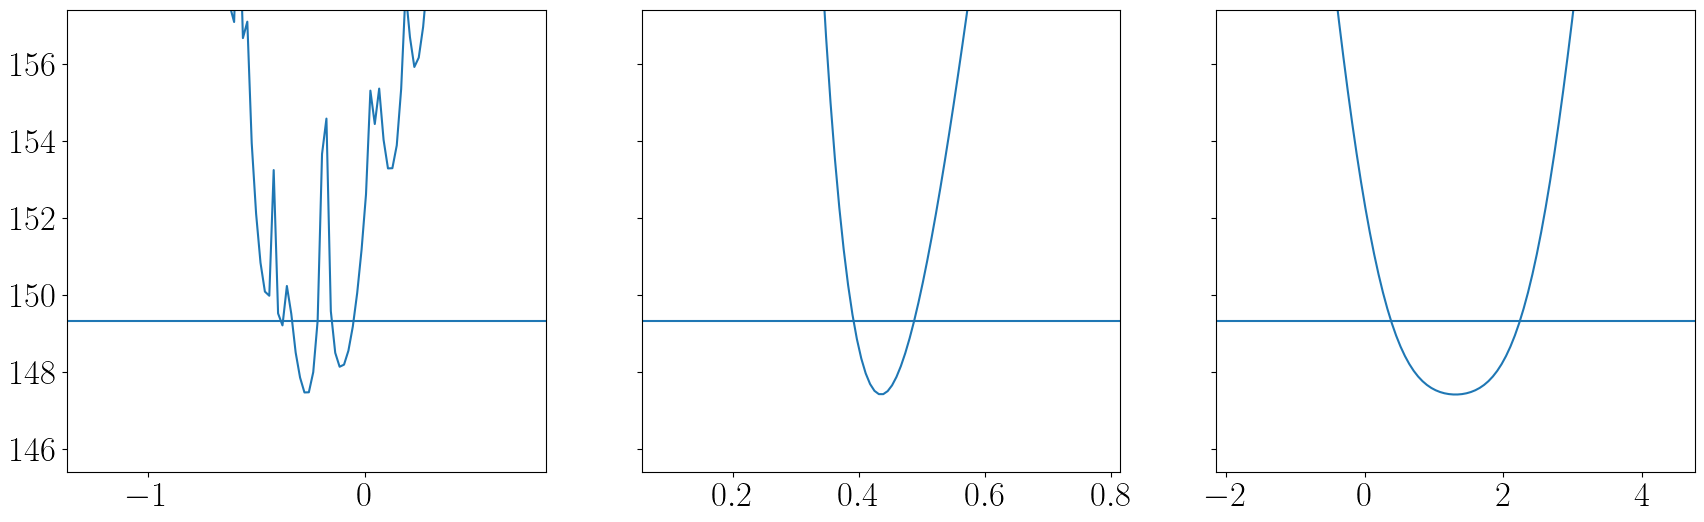

eta:  -0.27071822432132747 , error:  0.05982019333164621 0.106
sigma:  0.43242176179301295 , error:  0.034293273766833096 0.04801058327356634
grad:  1.3064179931372255 , error:  0.9094048659845098 0.9299114254625788


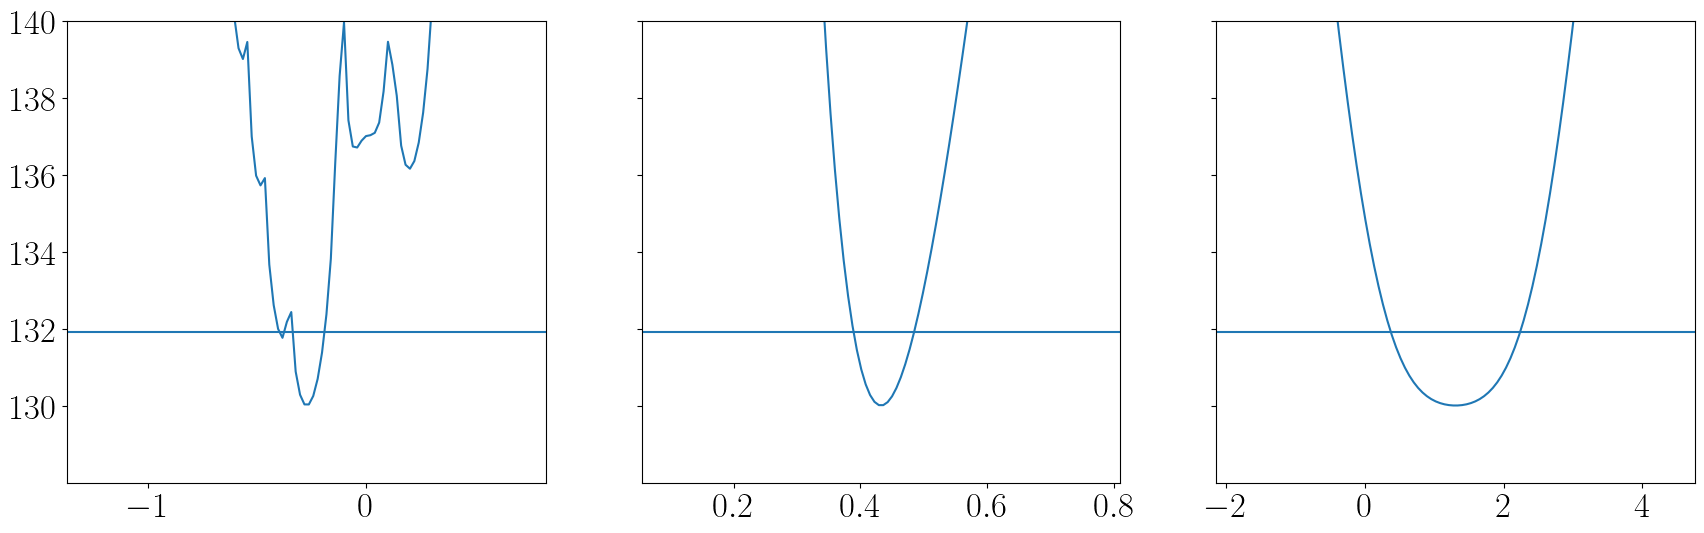

eta:  -0.26088502441186734 , error:  0.06004793980831967 0.13
sigma:  0.4358594305990265 , error:  0.034565899916048574 0.04839225988246801
grad:  1.3156092893558429 , error:  0.9235475086574755 0.942477796076938


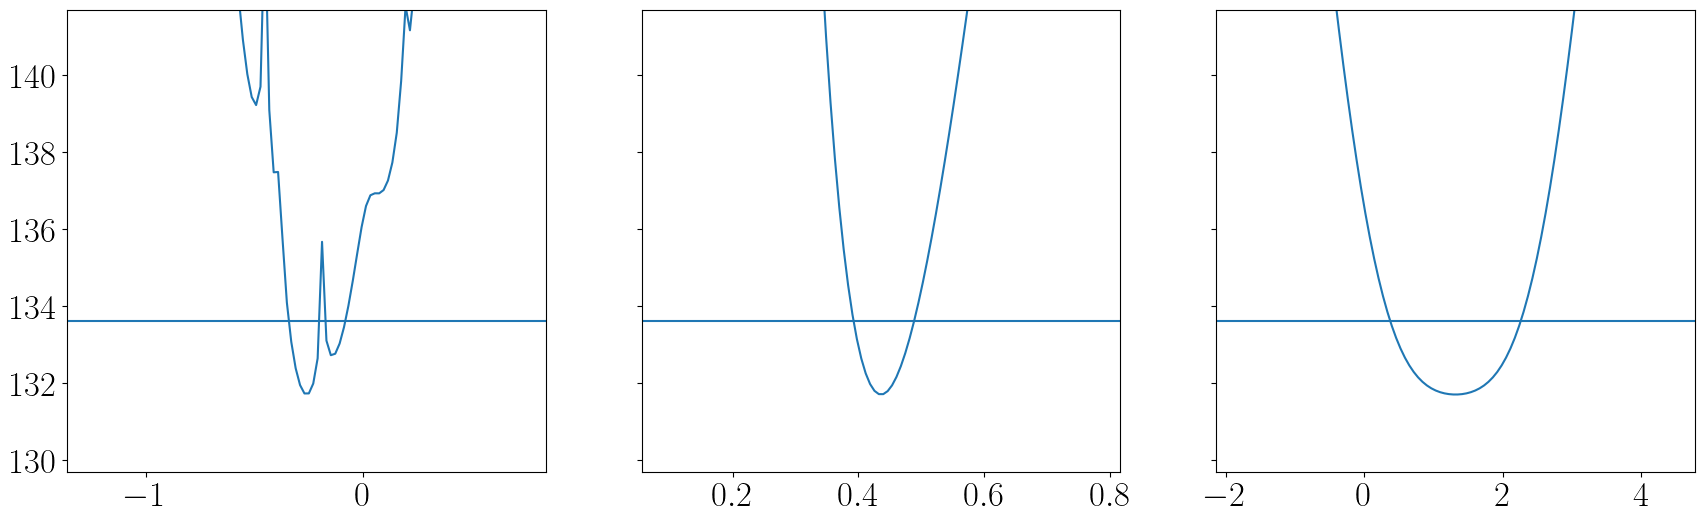

eta:  -0.29921471154843093 , error:  0.05386243869376902 0.07
sigma:  0.4525752846762506 , error:  0.03589155182991855 0.05024817256188597
grad:  2.401478595882243 , error:  0.4844174395072441 1.7341591447815659


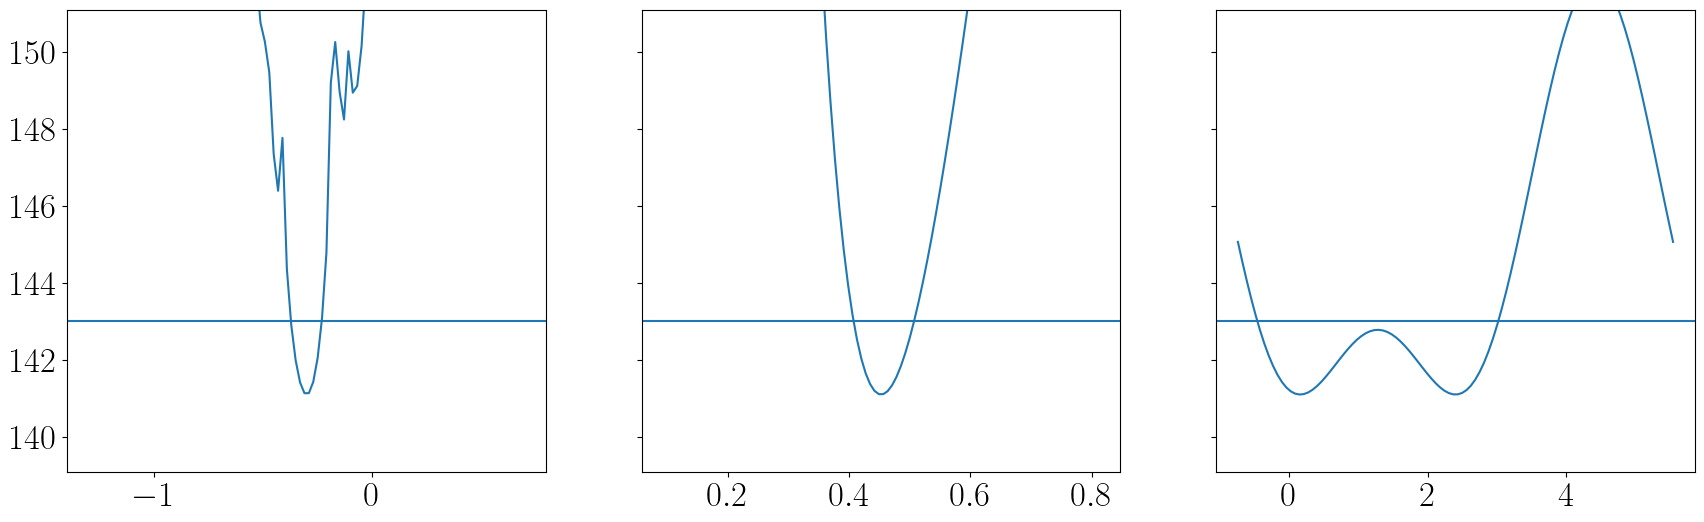

eta:  0.04561117226365145 , error:  0.057904313575069796 0.214
sigma:  0.4708112795491856 , error:  0.037337751101013845 0.052272851541419384
grad:  -0.0823756950568741 , error:  0.477192550098238 3.141592653589793


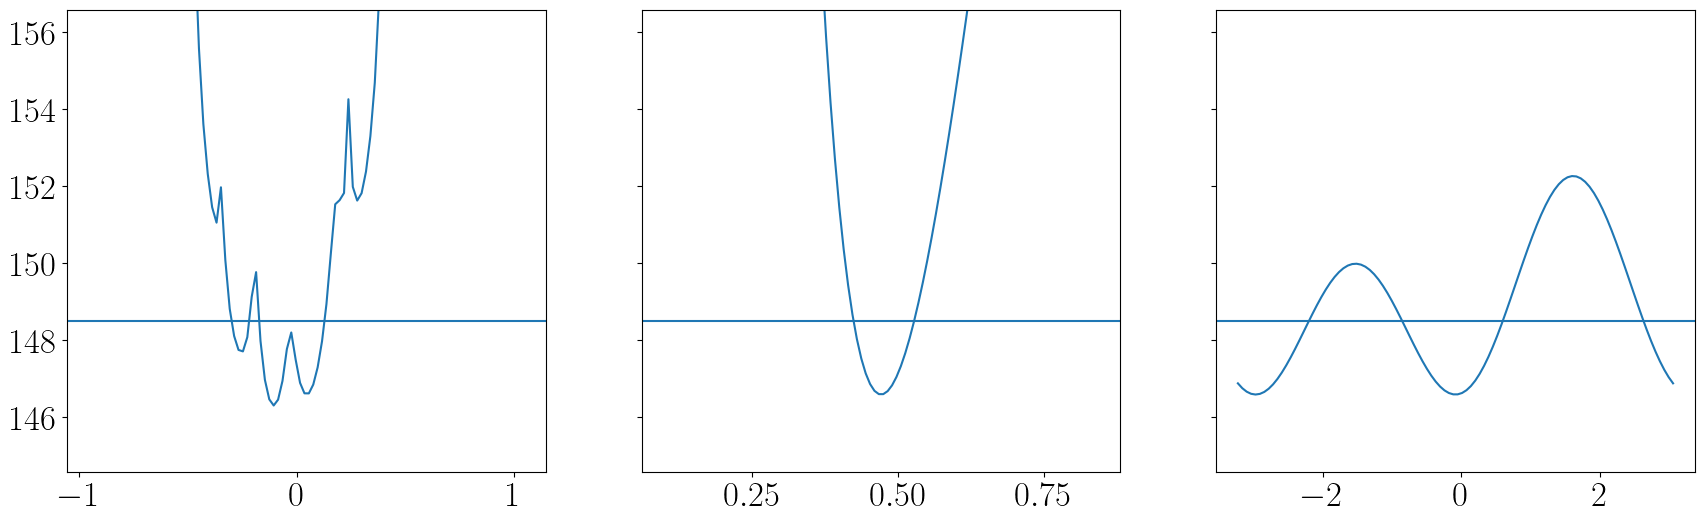

In [7]:
etas_map = [] 
etas_err_hess = [] 
etas_err_brute = []


for theta_smooth in data: 
    phi = theta_smooth[1:] - theta_smooth[:-1]
    eta, grad = MAP(phi)
    sigma = get_MAP_sigma(phi, eta, grad)
    errs_hess = 2*np.array(errors_hess(phi, eta, sigma, grad, diff=1e-4))
    widths = errs_hess*10
    widths[-1] = np.pi 
    widths[0] = 1 
    errs_brute = errors_brute(phi, eta, sigma, grad, diff=widths)
    print('eta: ', eta, ', error: ', errs_hess[0], errs_brute[0])
    print('sigma: ', sigma, ', error: ', errs_hess[1], errs_brute[1])
    print('grad: ', grad, ', error: ', errs_hess[2], errs_brute[2])
    plot_cost(phi, eta, sigma, grad, widths=widths)
    
    etas_map.append(eta)
    etas_err_hess.append(errs_hess[0])
    etas_err_brute.append(errs_brute[0]) 

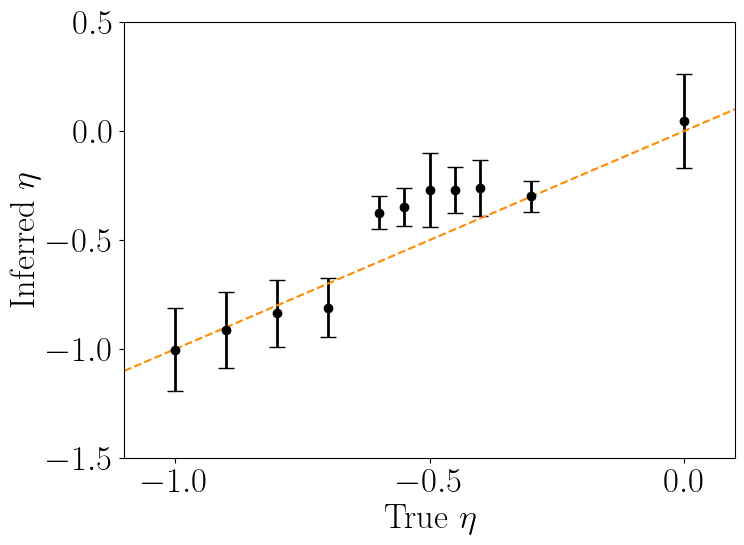

In [8]:
plt.rc('font', size=25, family='serif')
plt.rc('text', usetex=True)

plt.figure(figsize=(8, 6))

plt.errorbar(etas, etas_map, etas_err_brute, fmt='o', linewidth=2, color='k', capsize=6)
plt.plot(np.linspace(-1.1, 0.1, 10), np.linspace(-1.1, 0.1, 10), '--', color='darkorange')
plt.xlabel(r'True $\eta$')
plt.ylabel(r'Inferred $\eta$')
plt.xticks([-1, -0.5, 0])
plt.ylim([-1.5, 0.5])
plt.xlim([-1.1, 0.1])
plt.tight_layout()
plt.savefig('Figures/sim_eta.pdf', bbox_inches="tight")
plt.show()
